In [210]:
import numpy as np
import sys
sys.path.append(
    '/global/u1/s/sfschen/Python/velocileptors/')

from matplotlib import pyplot as plt
from compute_pell_tables import compute_pell_tables, kvec

In [127]:
# Remake the data grid:
order = 3
Npoints = 2*order + 1
# these are OmegaM, h, sigma8
x0s = [0.311057, 0.6766, 0.81]; Nparams = len(x0s)
dxs = [0.01, 0.01, 0.05]

output_shape = (len(kvec),19)

center_ii = (order,)*Nparams
P0grid = np.zeros( (Npoints,)*Nparams+ output_shape)
P2grid = np.zeros( (Npoints,)*Nparams+ output_shape)

In [128]:
# Load data
for ii in range(Npoints):
    for jj in range(Npoints):
        for kk in range(Npoints):
            #print(ii,jj,kk)
            P0grid[ii,jj,kk] = np.loadtxt('data/p0_%d_%d_%d.txt'%(ii,jj,kk))
            P2grid[ii,jj,kk] = np.loadtxt('data/p2_%d_%d_%d.txt'%(ii,jj,kk))

In [253]:
# Now compute the derivatives
from taylor_approximation import compute_derivatives

derivs0 = compute_derivatives(P0grid, dxs, center_ii, 4)
derivs2 = compute_derivatives(P2grid, dxs, center_ii, 4)

In [206]:
from taylor_approximation import taylor_approximate
test_point = [0.25, 0.72, 0.6]
p0test = taylor_approximate(test_point, x0s, derivs0)
p2test = taylor_approximate(test_point, x0s, derivs2)

Taking the order 3 Taylor series.
Taking the order 3 Taylor series.


In [207]:
p0, p2 = compute_pell_tables(test_point)

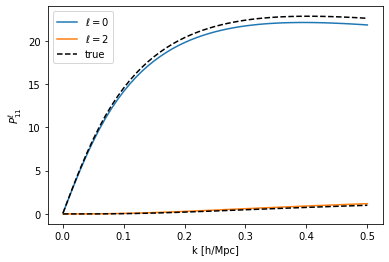

In [208]:
ii = 5

plt.plot(kvec, kvec * p0test[:,ii], label=r'$\ell=0$')
plt.plot(kvec, kvec * p0[:,ii], 'k--')

plt.plot(kvec, kvec * p2test[:,ii], label=r'$\ell=2$')
plt.plot(kvec, kvec * p2[:,ii], 'k--', label='true')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P^\ell_{11}$')
plt.legend()

Text(0, 0.5, '$\\Delta P_\\ell /P_\\ell$')

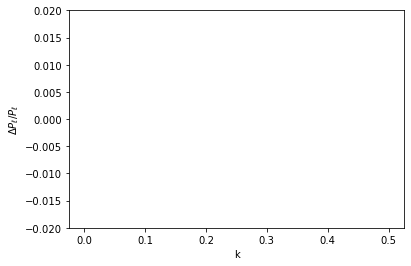

In [209]:
plt.plot(kvec, p0test[:,ii]/p0[:,ii]-1)
plt.plot(kvec, p2test[:,ii]/p2[:,ii]-1)

plt.ylim(-0.02,0.02)
plt.xlabel('k')
plt.ylabel(r'$\Delta P_\ell /P_\ell$')

In [186]:
p0planck, p2planck = compute_pell_tables(x0s)

(-100.0, 600.0)

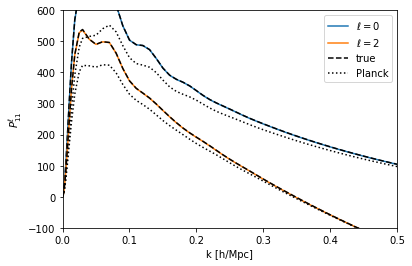

In [146]:
plt.plot(kvec, kvec * p0test[:,0], label=r'$\ell=0$')
plt.plot(kvec, kvec * p0[:,0], 'k--')
plt.plot(kvec, kvec * p0planck[:,0], 'k:')

plt.plot(kvec, kvec * p2test[:,0], label=r'$\ell=2$')
plt.plot(kvec, kvec * p2[:,0], 'k--', label='true')
plt.plot(kvec, kvec * p2planck[:,0], 'k:',label='Planck')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P^\ell_{11}$')
plt.legend()
plt.xlim(0,0.5)
plt.ylim(-100,600)

In [223]:
# Come up with a file format:
import json

list0 = [ dd.tolist() for dd in derivs0 ]
list2 = [ dd.tolist() for dd in derivs2 ]

In [220]:
np.array(list0[3]).shape

(3, 3, 3, 59, 19)

In [225]:
outfile = 'emu/pkells_planck.json'

outdict = {'params': ['omegam', 'h', 'sigma8'],\
           'x0': x0s,\
           'derivs0': list0,\
           'derivs2': list2}

json_file = open(outfile, 'w')
json.dump(outdict, json_file)
json_file.close()

In [228]:
# Let's reproduce things by reloading the saved file
json_file = open(outfile, 'r')
emu = json.load( json_file )
json_file.close()

In [258]:
test_point = [0.28, 0.70, 0.6]

#x0s = emu['x0']
#derivs0 = [np.array(ll) for ll in emu['derivs0']]
#derivs2 = [np.array(ll) for ll in emu['derivs2']]

p0test = taylor_approximate(test_point, x0s, derivs0)
p2test = taylor_approximate(test_point, x0s, derivs2)

Taking the order 4 Taylor series.
Taking the order 4 Taylor series.


In [259]:
p0, p2 = compute_pell_tables(test_point)

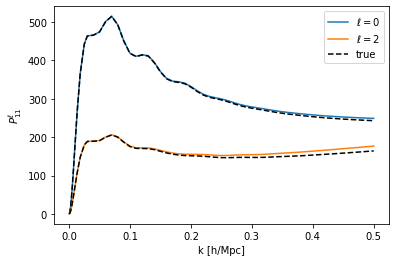

In [260]:
ii = 1

plt.plot(kvec, kvec * p0test[:,ii], label=r'$\ell=0$')
plt.plot(kvec, kvec * p0[:,ii], 'k--')

plt.plot(kvec, kvec * p2test[:,ii], label=r'$\ell=2$')
plt.plot(kvec, kvec * p2[:,ii], 'k--', label='true')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P^\ell_{11}$')
plt.legend()

Text(0, 0.5, '$\\Delta P_\\ell /P_\\ell$')

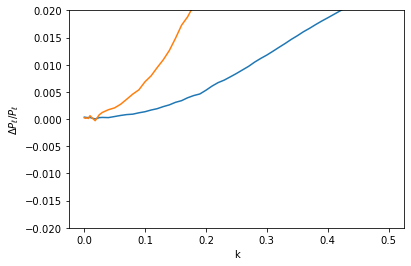

In [261]:
plt.plot(kvec, p0test[:,ii]/p0[:,ii]-1)
plt.plot(kvec, p2test[:,ii]/p2[:,ii]-1)

plt.ylim(-0.02,0.02)
plt.xlabel('k')
plt.ylabel(r'$\Delta P_\ell /P_\ell$')